In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from classification_workflow import *
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns

In [2]:
farm = pd.read_csv("farm_data_train.csv")

In [3]:
X = farm.drop(['DIFF'],axis=1) # 'R17','R32', R14, R2
y = farm['DIFF'] #Target
from sklearn.model_selection import train_test_split
import random
#random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=200)

In [4]:
import scipy
import math
numerical_features = ['R2', 'R14', 'R17', 'R32']
dataScaled_x= farm
#dataScaled_y = farm['R14']

#Coef de skewness
def highly_skewed_data(numerical_features, dataScaled):
    transform_cols=[]
    for column in numerical_features:
        skew= scipy.stats.skew(dataScaled[column], axis=0)
        if skew>=1 or skew<=-1:
            transform_cols.append(column)
    return transform_cols

transform_cols_x = highly_skewed_data(numerical_features, dataScaled_x)
#transform_cols_y = highly_skewed_data(['Sal'], dataScaled_y)
print(transform_cols_x)

#Renaming the columns in transform_cols 
#def take_log_col(col):
 #   if col in transform_cols_x or col in transform_cols_y: return col + '_log1p'
  #  else: return col

#applying the log transformation to our training and testing data
def add_log1p_col(train_copy, transform_cols):
    for col in transform_cols:
        #col_log1p = col + '_log1p'
        train_copy[col] = train_copy[col].apply(math.log1p)


add_log1p_col(X_train, transform_cols_x)
#add_log1p_col(Y, transform_cols_y)
add_log1p_col(X_test, transform_cols_x)

['R14']


In [5]:
dict_models = {'RandomForestClassifier': {
            'model': RandomForestClassifier(),
            'param_grid': {
                'n_estimators': [50, 100, 150, 200, 300, 400],
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 10, 20],
                'bootstrap': [True, False]
            }
    },
}

Going through each model defined in the dictionnary...:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting 10 folds for each of 72 candidates, totalling 720 fits


c:\Users\naim\Desktop\Binary-classification\classification_workflow.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame([new_row])], ignore_index=True)


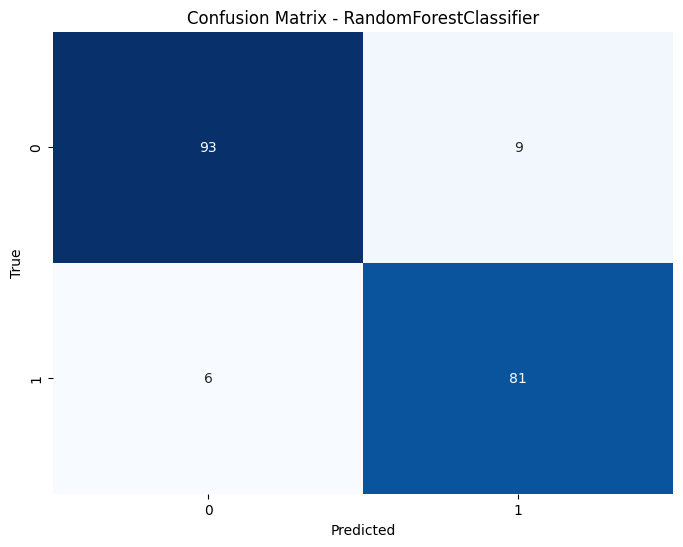

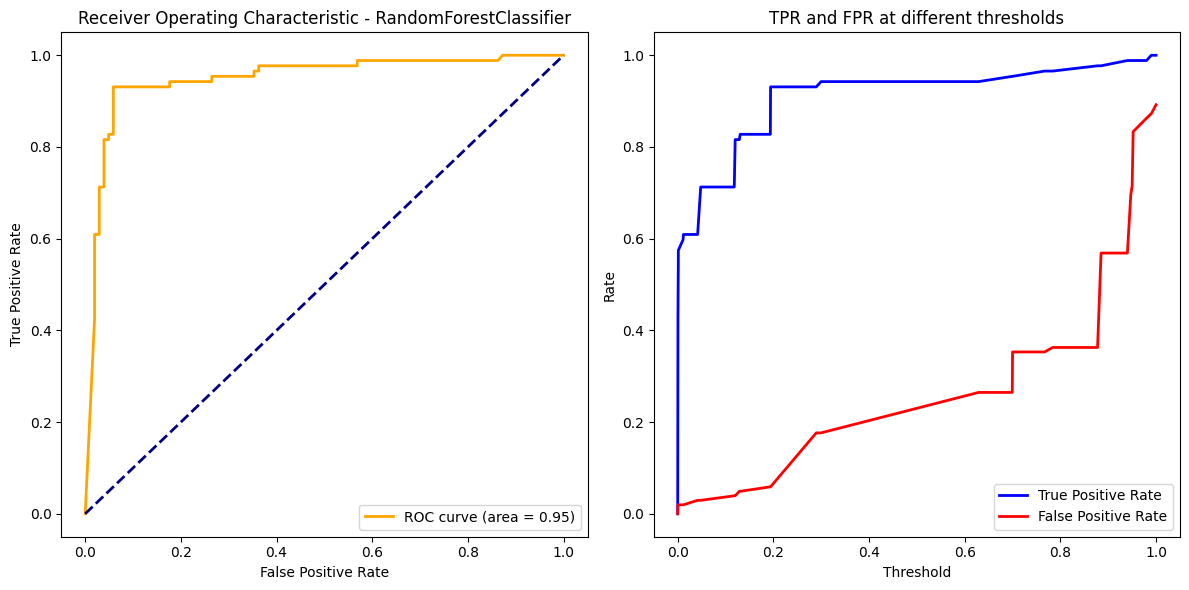

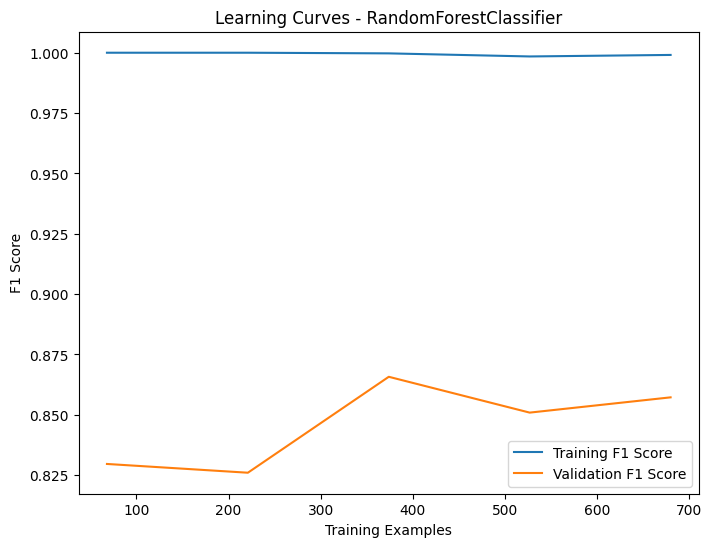

Going through each model defined in the dictionnary...: 100%|██████████| 1/1 [03:41<00:00, 221.68s/it]

Model: RandomForestClassifier
Accuracy: 0.9206349206349206
Precision: 0.9
Recall: 0.9310344827586207
ROC-AUC: 0.9486702727067838




In [6]:

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=10) # avant 40 10 90%, 10 10 200  91%, 
display_results(dict_models, X_train, y_train, X_test, y_test, cv, 'f1 scoring on farm data(%)')


Going through each model defined in the dictionnary...:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting 10 folds for each of 72 candidates, totalling 720 fits


c:\Users\naim\Desktop\Binary-classification\classification_workflow.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame([new_row])], ignore_index=True)


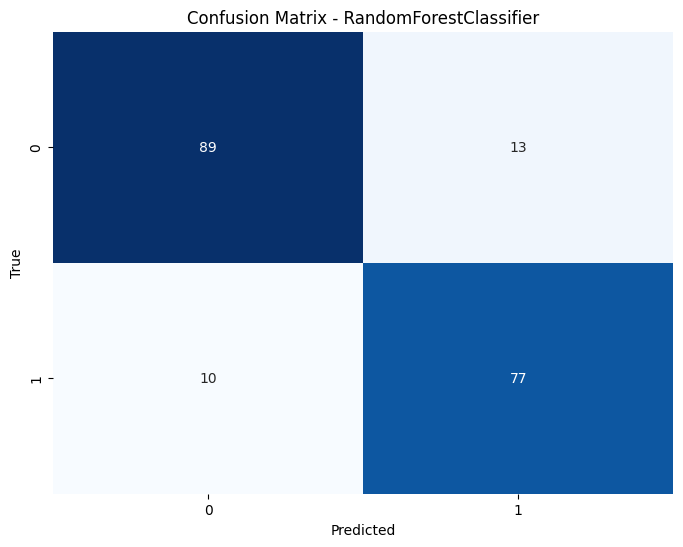

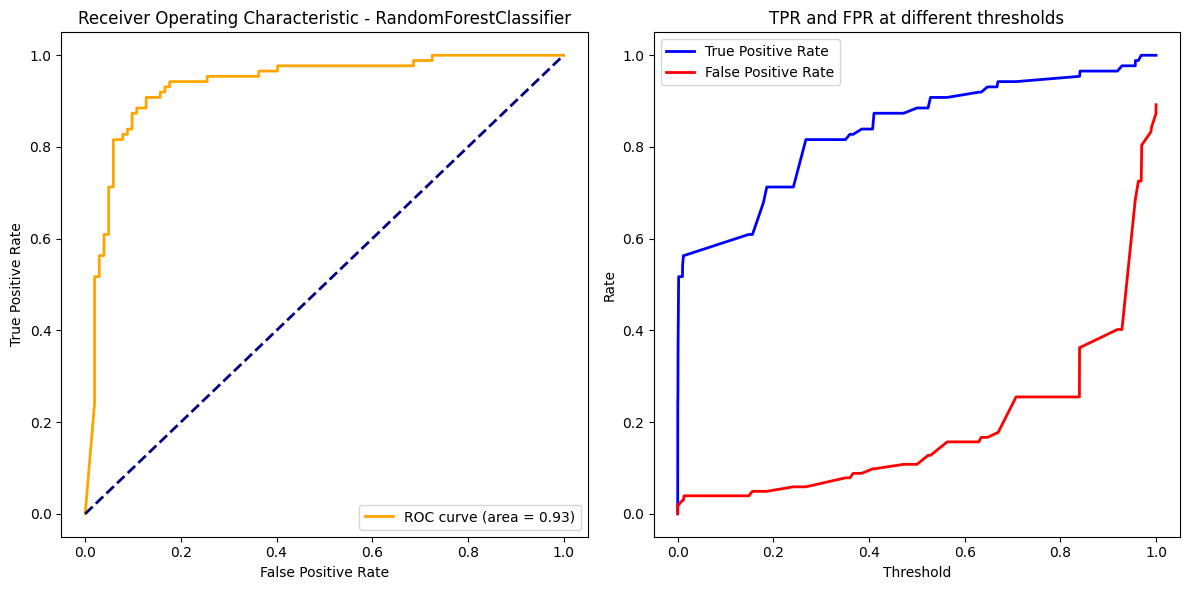

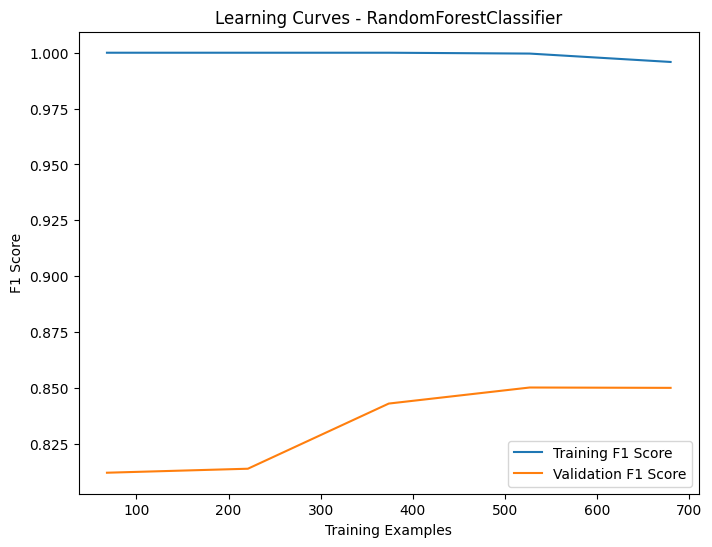

Going through each model defined in the dictionnary...: 100%|██████████| 1/1 [02:36<00:00, 156.75s/it]

Model: RandomForestClassifier
Accuracy: 0.8783068783068783
Precision: 0.8555555555555555
Recall: 0.8850574712643678
ROC-AUC: 0.9347532116294794




In [7]:
X1 = farm.drop(['DIFF', 'R17','R32'], axis=1)   # 'R17','R32', R14, R2
Y1 = farm['DIFF'] #Target

from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1,test_size=.20,random_state=200)
cvs = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
display_results(dict_models, X1_train, y1_train, X1_test, y1_test, cvs, 'f1 scoring on farm data(%)')

